1. Prétraitement et exploration des données
      
  A) Importation de bibliothèques et de jeux de données




In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats
from matplotlib import style
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')
data = pd.read_csv("Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


      B) Statistiques descriptives


In [17]:
data.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [18]:
data.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [19]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

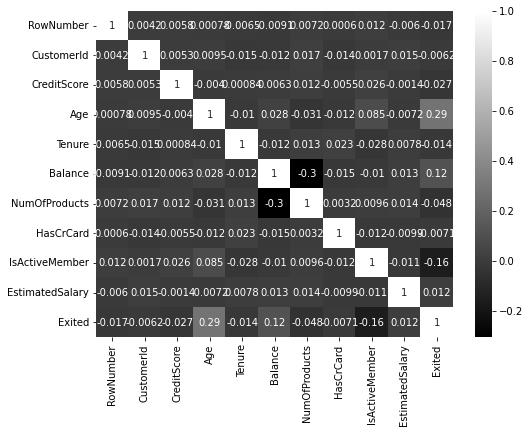

In [20]:
import seaborn as sb
ig,axis = plt.subplots(figsize=(8,6))
axis = sb.heatmap(data=data.corr(method='pearson',min_periods=1),annot=True,cmap="gray")

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

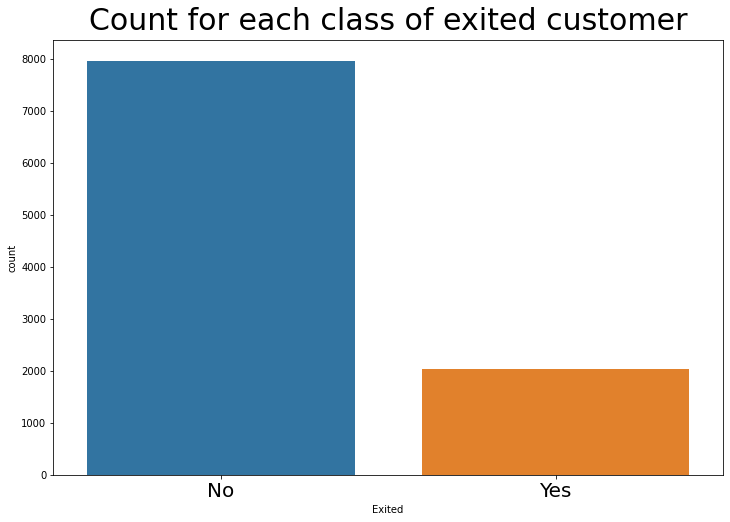

In [21]:
data.Exited.value_counts()
plt.figure(figsize=(12, 8))
exited_plot = sns.countplot(x=data.Exited)
exited_plot.set_title('Count for each class of exited customer',
                      fontsize=30,
                      pad=10)
exited_plot.set_xticklabels(['No', 'Yes'], fontsize=20)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


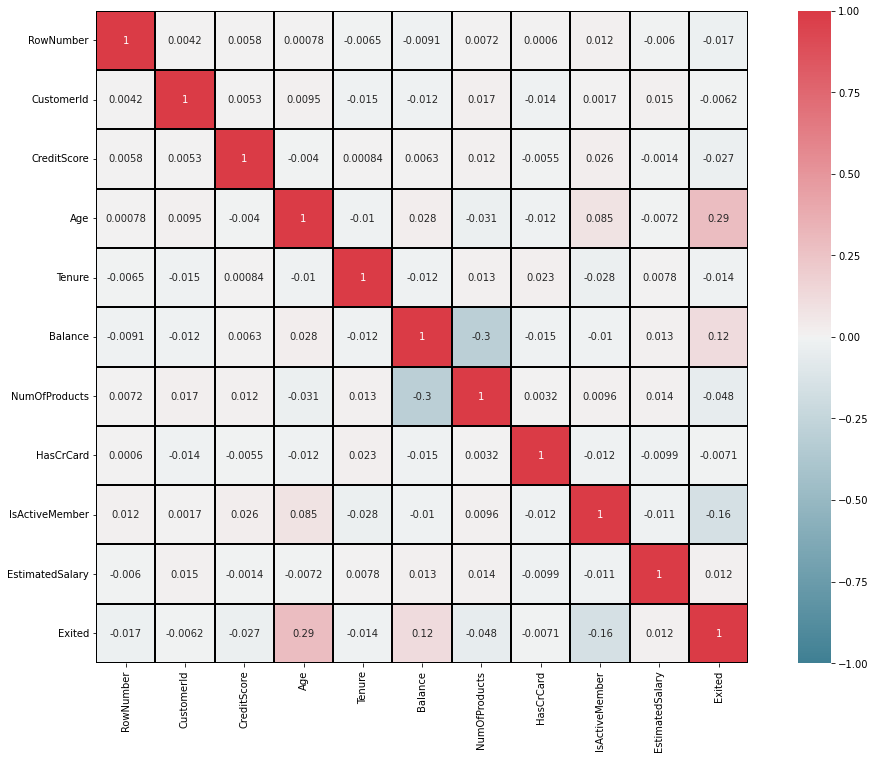

In [23]:
f, ax = plt.subplots(figsize=(18,12))  #Width,height

corr = data.corr()
#sns.heatmap(corr, cmap = 'coolwarm')
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

In [24]:
cat_names = data.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Surname')
cat_names

['Geography', 'Gender']

In [25]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(data['Exited'],data[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

Geography
3.830317605354266e-66
Gender
2.2482100097131755e-26


      C) Boîte à moustaches


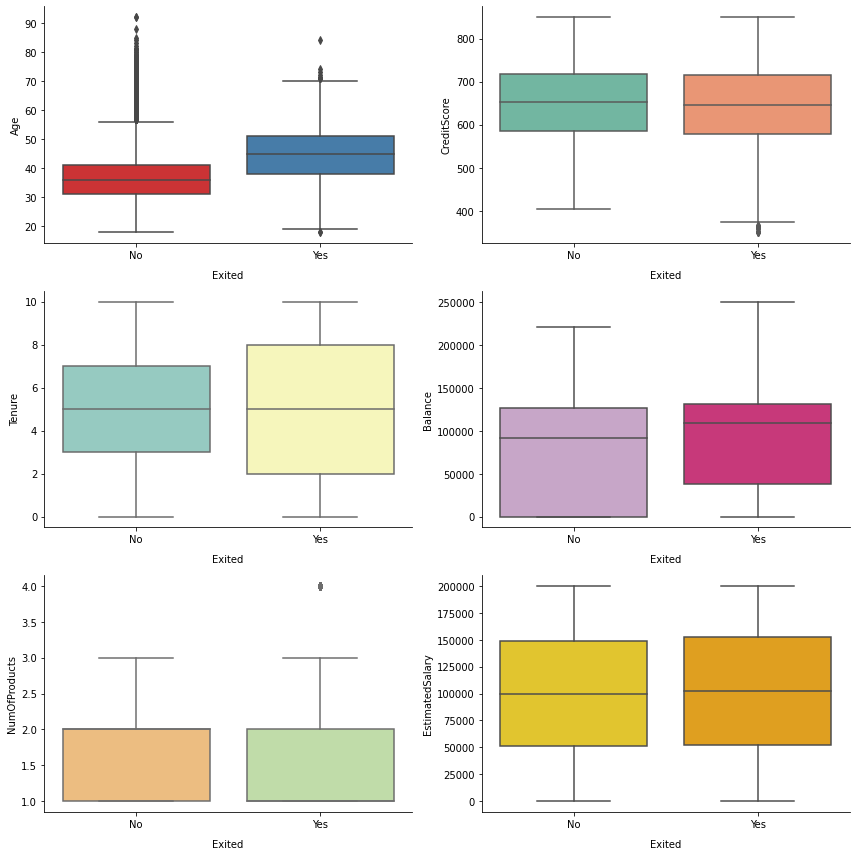

In [26]:
import seaborn as sns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
numerical_labels = [['Age', 'CreditScore'], 
                    ['Tenure', 'Balance'],
                   ['NumOfProducts', 'EstimatedSalary']]
num_colors = [['Set1', 'Set2'], 
              ['Set3', 'PuRd'],
              ['Spectral', 'Wistia']]
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i in range(3):
    for j in range(2):
        feature = numerical_labels[i][j]
        color = num_colors[i][j]
        ax1 = sns.boxplot(x='Exited', y=feature, palette=color, data=data, ax=ax[i][j])
        ax1.set_xlabel('Exited', labelpad=10)
        ax1.set_xticklabels(['No', 'Yes'])
sns.despine()
# this prevents plots from overlapping
plt.tight_layout()

      D) Nuage de points


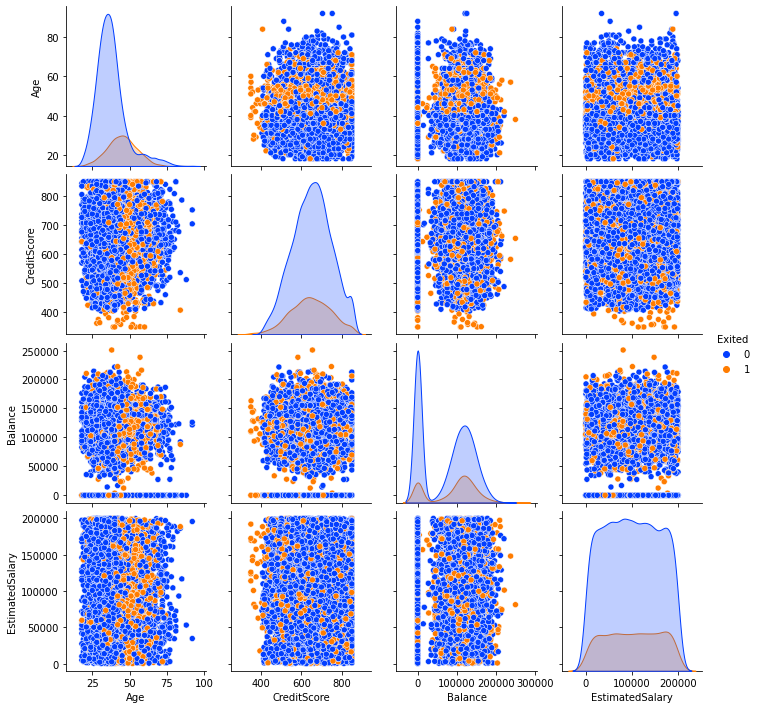

In [27]:
sns.pairplot(data, vars=['Age', 'CreditScore', 'Balance', 'EstimatedSalary'], 
             hue="Exited", palette='bright')
sns.despine()


      E) Variables d'entrée et cible avec l'utilisation de iloc (X/Y)


In [28]:
x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(10000, 10)
(10000,)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


      F) Encodage des données catégorielles


In [29]:
x = pd.get_dummies(x)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [30]:
x.shape

(10000, 13)

      G) Fractionnement de l'ensemble de données en ensembles de train et de test


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True, stratify=y, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 13)
(8000,)
(2000, 13)
(2000,)


      H) Mise à l'échelle des fonctionnalités (feature scaling)


In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.240217,0.779861,0.353903,-1.234514,-0.902981,-1.549632,-1.038490,1.640990,0.998002,-0.578120,-0.575041,1.096651,-1.096651
1,0.759749,-0.273827,0.353903,0.285421,0.813713,0.645314,0.962936,-1.555875,-1.002002,1.729744,-0.575041,-0.911867,0.911867
2,-1.727256,-0.944356,-0.339090,0.855696,-0.902981,0.645314,-1.038490,1.103811,0.998002,-0.578120,-0.575041,1.096651,-1.096651
3,0.044735,-0.178037,0.353903,0.518006,0.813713,0.645314,-1.038490,-1.709357,0.998002,-0.578120,-0.575041,-0.911867,0.911867
4,-1.924143,-0.561197,0.007406,-1.234514,0.813713,-1.549632,0.962936,-0.375574,0.998002,-0.578120,-0.575041,-0.911867,0.911867


In [33]:
amount_retained = data[data['Exited'] == 0]['Exited'].count() / data.shape[0] * 100
amount_lost = data[data['Exited'] == 1]['Exited'].count() / data.shape[0] * 100

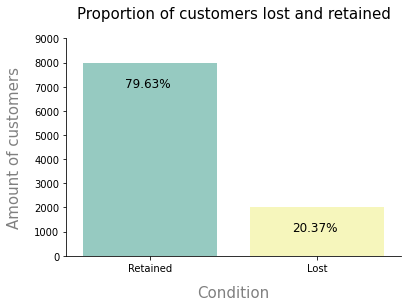

In [34]:
fig, ax = plt.subplots()
sns.countplot(x='Exited', palette="Set3", data=data)
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.15, 7000, f"{round(amount_retained, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_lost, 2)}%", fontsize=12)
sns.despine()
plt.show()

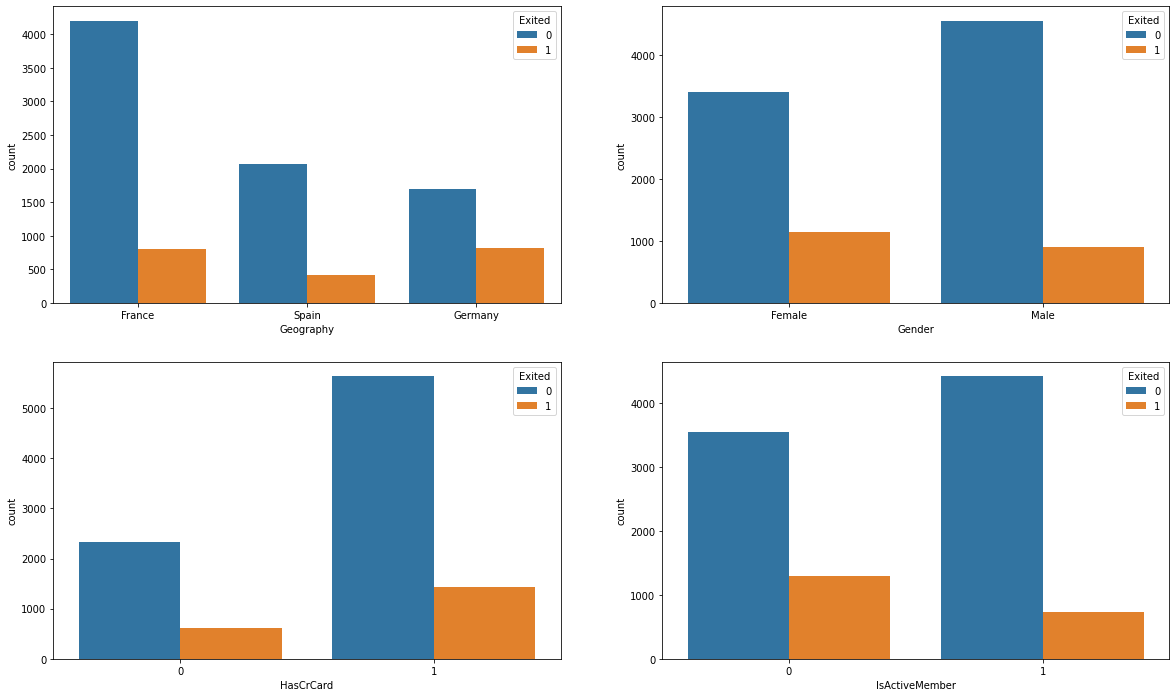

In [35]:
   # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

2. Utilisation du k Voisins les plus proches (KNN)


Training Accuracy : 0.875125
Testing Accuaracy : 0.8235
[[1505   88]
 [ 265  142]]


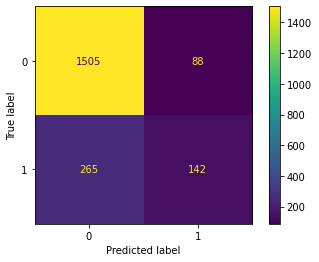

In [36]:

from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
model_KNeighborsClassifier = KNeighborsClassifier(n_jobs=-1)
model_KNeighborsClassifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix

model_KNeighborsClassifier.fit(x_train, y_train)

y_pred = model_KNeighborsClassifier.predict(x_test)

print("Training Accuracy :", model_KNeighborsClassifier.score(x_train, y_train))
print("Testing Accuaracy :", model_KNeighborsClassifier.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_KNeighborsClassifier, x_test, y_test)  
plt.show()

3. Utilisation de l'Arbre de décision


Training Accuracy : 1.0
Testing Accuaracy : 0.794
[[1387  206]
 [ 206  201]]


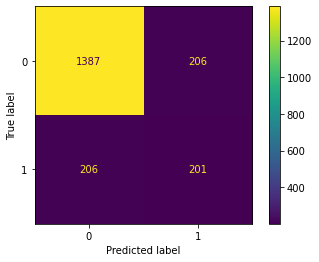

In [37]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model_DecisionTree = DecisionTreeClassifier() 
model_DecisionTree.fit(x_train, y_train)

y_pred = model_DecisionTree.predict(x_test)

print("Training Accuracy :", model_DecisionTree.score(x_train, y_train))
print("Testing Accuaracy :", model_DecisionTree.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_DecisionTree, x_test, y_test)  
plt.show()

4. Utilisation du Random Forest


Training Accuracy : 1.0
Testing Accuaracy : 0.8615
[[1537   56]
 [ 221  186]]


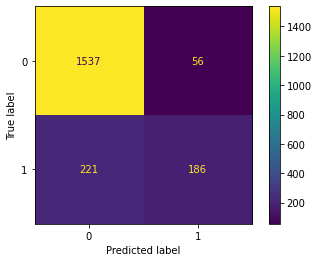

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest = RandomForestClassifier() 
model_RandomForest.fit(x_train, y_train)

y_pred = model_RandomForest.predict(x_test)

print("Training Accuracy :", model_RandomForest.score(x_train, y_train))
print("Testing Accuaracy :", model_RandomForest.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_RandomForest, x_test, y_test)  
plt.show()

5. utilisation du Features selection


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest code here
selector = SelectKBest(f_classif, k=13)

selector_fit = selector.fit(x_train, y_train)

dfscores = pd.DataFrame(selector_fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  # imav 15, posto 

    Specs       Score
1       1  733.918842
9       9  244.948179
6       6  187.651790
3       3  106.743102
12     12   97.406912
11     11   97.406912
8       8   87.527911
10     10   22.074755
4       4   16.582561
0       0    7.515045
2       2    2.198409
7       7    1.639055
5       5    0.606174


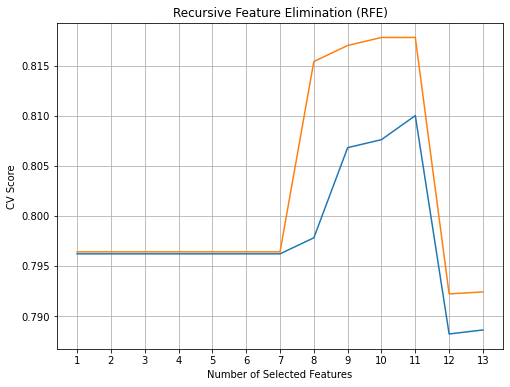

The optimal number of features: 11


In [40]:
# Sélection de fonctionnalités pour améliorer la construction de modèles
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(2, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(x, y)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, x.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

Features Importance

In [57]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=101)

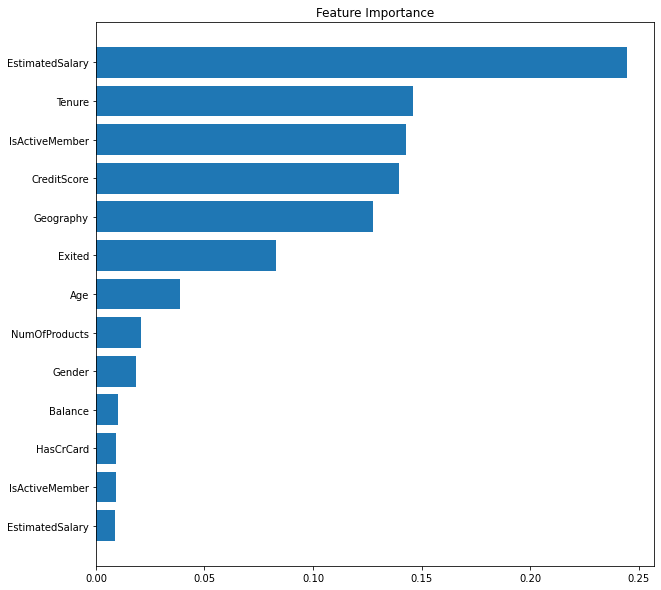

In [64]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [data.columns[i] for i in indices-3]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(x.shape[1]),importances[indices],align = 'center')
plt.yticks(range(x.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

6. utilisation du SVM


Training Accuracy : 0.864
Testing Accuracy : 0.852
[[1564   29]
 [ 267  140]]


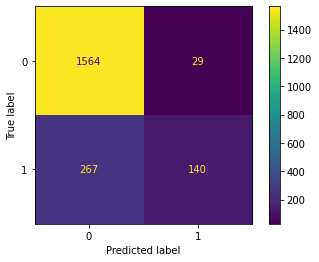

In [41]:
from sklearn.svm import SVC

model_SVM = SVC()
model_SVM.fit(x_train, y_train)

y_pred = model_SVM.predict(x_test)

print("Training Accuracy :", model_SVM.score(x_train, y_train))
print("Testing Accuracy :", model_SVM.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_SVM, x_test, y_test)  
plt.show()

7. utilisation de la Régression logistique


In [42]:
# Creating a function to create prediction model for Logistic Regression
def get_lr_model(y_train,X_train, X_test):
    model_LogisticRegression = LogisticRegression(max_iter=100000000)
    model_LogisticRegression.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model_LogisticRegression.coef_[0]]
    intercept = model_LogisticRegression.intercept_[0]
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model_LogisticRegression.intercept_)
    y_pred = model_LogisticRegression.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('Confusion Matrix from sklearn\n',confusion_matrix(y_test, y_pred))
    print('Accuracy Scores from sklearn:\n',accuracy_score(y_test, y_pred))
    print('Classification Report from sklearn:\n',classification_report(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred)
    return model_LogisticRegression, arr, intercept

In [43]:
# Function to plot confusion matrix
def confusion_matrix_plot(y_test, y_pred):
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()


Printing model coefficients and intercept summary for sklearn model:
 [[ 0.         -0.07553363]
 [ 1.          0.76679716]
 [ 2.         -0.0493405 ]
 [ 3.          0.161266  ]
 [ 4.         -0.05879062]
 [ 5.         -0.02471882]
 [ 6.         -0.51810544]
 [ 7.          0.03191947]
 [ 8.         -0.11938385]
 [ 9.          0.22598347]
 [10.         -0.08845923]
 [11.          0.1393551 ]
 [12.         -0.1393551 ]] [-1.65179636]

Printing predicted and actual values from sklearn:
 [[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]
Confusion Matrix from sklearn
 [[1534   59]
 [ 323   84]]
Accuracy Scores from sklearn:
 0.809
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.59      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.60      2000
weighted avg       0.78      0.81      0.77      2000



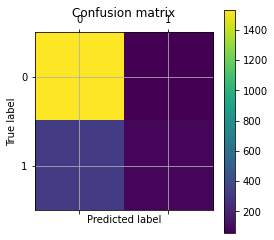

In [44]:
# Run logistic regression model
model_lr, arr, intercept = get_lr_model(y_train,x_train, x_test)

8. Tableau récapitulatif des différents résultats des différentes méthodes (Accuracy/Recall/Precision)


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [46]:
y_pred = model_KNeighborsClassifier.predict(x_test)


In [47]:
#Performance evaluation
def print_scores(model_KNeighborsClassifier, y_true, y_pred):
        print(model_KNeighborsClassifier)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_KNeighborsClassifier, y_test, y_pred)

KNeighborsClassifier(n_jobs=-1)
accuracy:  0.8235
precision:  0.6173913043478261
recall:  0.3488943488943489
f1_score:  0.8036231512848053


In [48]:
y_pred = model_SVM.predict(x_test)


In [49]:
#Performance evaluation
def print_scores(model_SVM, y_true, y_pred):
        print(model_SVM)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_SVM, y_test, y_pred)

SVC()
accuracy:  0.852
precision:  0.8284023668639053
recall:  0.343980343980344
f1_score:  0.8265673026998962


In [50]:
y_pred = model_RandomForest.predict(x_test)


In [51]:
#Performance evaluation
def print_scores(model_RandomForest, y_true, y_pred):
        print(model_RandomForest)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_RandomForest, y_test, y_pred)

RandomForestClassifier()
accuracy:  0.8615
precision:  0.768595041322314
recall:  0.457002457002457
f1_score:  0.8473038708404776


In [52]:
y_pred = model_DecisionTree.predict(x_test)


In [53]:
#Performance evaluation
def print_scores(model_DecisionTree, y_true, y_pred):
        print(model_DecisionTree)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_DecisionTree, y_test, y_pred)

DecisionTreeClassifier()
accuracy:  0.794
precision:  0.49385749385749383
recall:  0.49385749385749383
f1_score:  0.7940000000000002


In [54]:
# Comparing performance of the 4 models

performance = {'Model': ['model_KNeighborsClassifier', 'model_SVM', 'model_RandomForest', 'model_DecisionTree','model_LogisticRegression'], 
               'Accuracy (%)': [0.82, 0.85, 0.86, 0.78,0.809], 
               'precision (%)': [0.617,0.828,0.768, 0.478,0.59], 
               'Recall (%)': [0.348, 0.343, 0.457, 0.5085,0.21]
              }
perf = pd.DataFrame(data=performance)
perf

,Model,Accuracy (%),precision (%),Recall (%)
0,model_KNeighborsClassifier,0.820,0.617,0.3480
1,model_SVM,0.850,0.828,0.3430
2,model_RandomForest,0.860,0.768,0.4570
3,model_DecisionTree,0.780,0.478,0.5085
4,model_LogisticRegression,0.809,0.590,0.2100


9. Utilisation du courbe de ROC pour choisir le bon modèle à retenir.


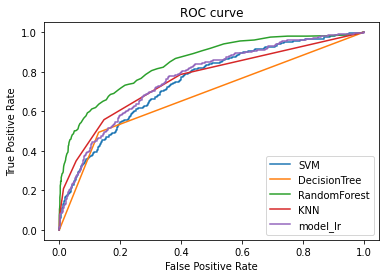

In [55]:
#define metrics
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve

model_SVM = SGDClassifier(loss='hinge',class_weight='balanced')
#by default, it fits a linear support vector machine (SVM)
model_SVM.fit(x_train, y_train)

y_test_pred = model_SVM.decision_function(x_test) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(test_fpr, test_tpr,  label='SVM')

y_pred_proba = model_DecisionTree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr, label='DecisionTree')

y_pred_proba = model_RandomForest.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr1,tpr1,label='RandomForest')


y_pred_proba = model_KNeighborsClassifier.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr3,tpr3,label='KNN')

y_pred_proba = model_lr.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr3,tpr3,label='model_lr')


plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

10. **Conclusion**
The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned 